In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [5]:
wq = pd.read_csv('wq.csv')
wq.head()

,Site_Id,Read_Date,Dissolved Oxygen (mg/L),pH (standard units),Secchi Depth (m),Water Depth (m),Water Temp (?C),Air Temp (F),Time (24:00),AirTemp (C),Year
0,A,1/10/2013,6.9,6.5,0.8,0.9,8.0,48,00:00,8.888889,2013
1,A,1/11/2012,8.2,6.5,0.9,0.9,12.0,53,00:00,11.666667,2012
2,A,1/14/2014,6.8,6.5,0.5,0.5,11.0,53,10:20,11.666667,2014
3,A,10/13/2011,4.0,6.5,0.7,0.8,22.0,75,00:00,23.888889,2011
4,A,10/13/2015,6.7,7.0,0.4,0.4,15.0,52,10:35,11.111111,2015


In [6]:
# It shows that most samples have been taken from the Bay and least number of samples is from Site C
fig = px.histogram(wq, x="Site_Id",\
                   histfunc='count', \
                   color='Site_Id', \
                   title='Count of readings from each Site Id')
fig.show()

In [7]:
# How does the oxygen saturations vary for each site across the years?
# showing a histogram of finding average and displaying text and applying tool barmode
#press shift + tab (on px.histogram)to get options of properties

fig = px.histogram(wq, x='Year', y='Dissolved Oxygen (mg/L)',\
                   color="Site_Id",\
                   barmode='group',\
                   histfunc='avg',\
                   text_auto=True,\
                   height=500,\
                   title='Average of Dissolved Oxygen for each Site during each year')
fig.show()

In [8]:
#by using facet col and facet col wrap, I have divided the readings site wise
fig = px.histogram(wq, x='Year', y='Dissolved Oxygen (mg/L)',\
                   color="Site_Id",\
                   barmode='group',\
                   histfunc='avg',\
                   facet_col='Site_Id',\
                   facet_col_wrap=3,\
                   text_auto=True,\
                   height=700,\
                   title='Average Dissolved Oxygen by year for each Site')

fig.show()

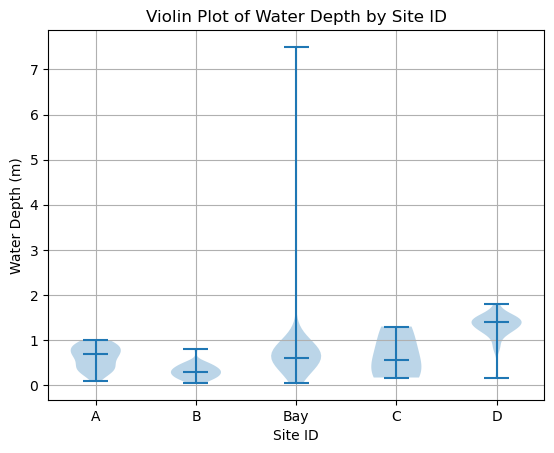

In [9]:
# Create violin plot
plt.violinplot(wq['Water Depth (m)'].groupby(wq['Site_Id']).apply(list), \
               showmeans=False, showmedians=True)

# Set x-axis ticks and labels
plt.xticks(ticks=range(1, len(wq['Site_Id'].unique()) + 1),\
           labels=wq['Site_Id'].unique())

# Set labels and title
plt.xlabel('Site ID')
plt.ylabel('Water Depth (m)')
plt.title('Violin Plot of Water Depth by Site ID')

# Enable grid
plt.grid(True)

# Show plot
plt.show()

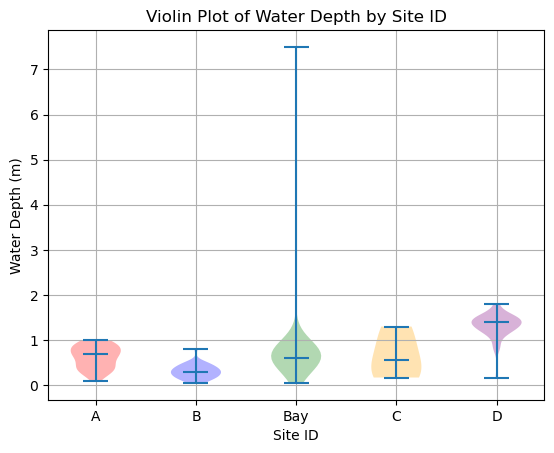

In [12]:
# Create violin plot
violins = plt.violinplot(dataset=wq['Water Depth (m)'].groupby(wq['Site_Id']).apply(list), \
                         showmeans=False, showmedians=True)

# Set x-axis ticks and labels
plt.xticks(ticks=range(1, len(violins['bodies']) + 1), labels=wq['Site_Id'].unique())

# Set labels and title
plt.xlabel('Site ID')
plt.ylabel('Water Depth (m)')
plt.title('Violin Plot of Water Depth by Site ID')

# Enable grid
plt.grid(True)

# Define your own colors
colors = ['red', 'blue', 'green', 'orange', 'purple']

# Set face color for each violin plot
for color, violin in zip(colors, violins['bodies']):
    violin.set_facecolor(color)

# Show plot
plt.show()

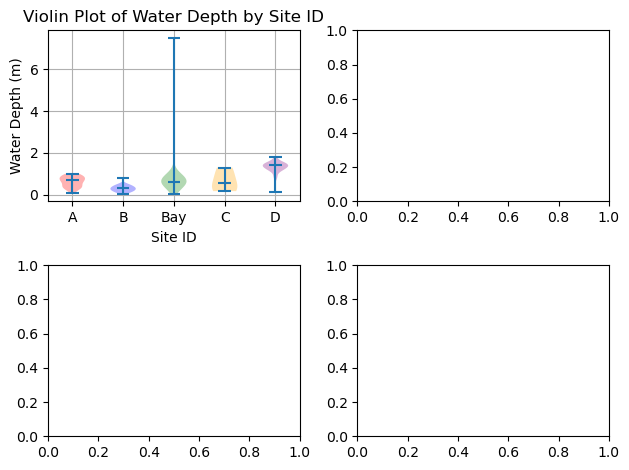

In [14]:
# Create a 2x2 grid of axes
fig, axs = plt.subplots(2, 2)

# Create violin plot on the first axes (row 0, column 0)
violins = axs[0, 0].violinplot(wq['Water Depth (m)'].groupby(wq['Site_Id']).apply(list),\
                               showmeans=False, showmedians=True)

# Define your own colors
colors = ['red', 'blue', 'green', 'orange', 'purple']

# Set face color for each violin plot
for color, violin in zip(colors, violins['bodies']):
    violin.set_facecolor(color)

# Set x-axis ticks and labels
axs[0, 0].set_xticks(ticks=range(1, len(violins['bodies']) + 1))
axs[0, 0].set_xticklabels(wq['Site_Id'].unique())

# Set labels and title
axs[0, 0].set_xlabel('Site ID')
axs[0, 0].set_ylabel('Water Depth (m)')
axs[0, 0].set_title('Violin Plot of Water Depth by Site ID')

# Enable grid
axs[0, 0].grid(True)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()